In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [21]:
#Loading dataset
source_dir = '/Akamai/MLDance/data/CSV/Pre-Processed/Combined/'
source_dir = '../../../data/CSV/Pre-Processed/Combined/'
raw_data = pd.read_csv(source_dir+'_comprehensive_.csv')

In [22]:
#Let's check how the data is distributed
data = raw_data.copy()
data.head()

,Time,Hips.X,Hips.Y,Hips.Z,Spine.X,Spine.Y,Spine.Z,Spine1.X,Spine1.Y,Spine1.Z,...,LeftToeBase.X.1,LeftToeBase.Y.1,LeftToeBase.Z.1,LeftToeBaseEnd.X.1,LeftToeBaseEnd.Y.1,LeftToeBaseEnd.Z.1,Hips.Pos.X.1,Hips.Pos.Y.1,Hips.Pos.Z.1,Sentiment.1
0,0.000185,0.473493,-0.500793,-0.500888,0.035260,-0.498380,-0.000132,9.304833e-08,-1.371683e-08,0.078843,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.001771,0.0021,-0.005172,1
1,0.000370,0.473607,-0.500925,-0.500863,0.035258,-0.498338,-0.000135,-8.163667e-07,-1.313344e-06,0.078843,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.004336,0.0034,-0.008922,1
2,0.000556,0.473662,-0.501599,-0.500165,0.035264,-0.498466,-0.000165,-1.050650e-04,-1.490489e-04,0.078843,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.003222,-0.0063,-0.004647,1
3,0.000741,0.473804,-0.501042,-0.500806,0.035264,-0.498479,-0.000177,-1.424917e-04,-1.908206e-04,0.078843,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.002597,-0.0015,-0.008847,1
4,0.000926,0.473839,-0.501317,-0.500656,0.035263,-0.498459,-0.000209,-2.114594e-04,-2.283817e-04,0.078819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001094,0.0049,-0.001354,1


In [23]:
#Information about the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114103 entries, 0 to 114102
Columns: 412 entries, Time to Sentiment.1
dtypes: float64(410), int64(2)
memory usage: 358.7 MB


In [24]:
#checking to see if there's any null variables
data.isnull().sum()

Time                  0
Hips.X                0
Hips.Y                0
Hips.Z                0
Spine.X               0
                     ..
LeftToeBaseEnd.Z.1    0
Hips.Pos.X.1          0
Hips.Pos.Y.1          0
Hips.Pos.Z.1          0
Sentiment.1           0
Length: 412, dtype: int64

In [25]:
#Preprocessing Data
col_list = list(data.columns)
end = [s for s in col_list if 'End' in s]
for col in end:
    data.pop(col)
data.pop('Time')

if('Sentiment.1' in col_list):
    data.pop('Sentiment.1')

data = data[data.Sentiment != 2]

In [26]:
# listing the unique values for the wine quality
data['Sentiment'].unique()

array([1, 0], dtype=int64)

In [27]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [28]:
data['Sentiment'] = label_quality.fit_transform(data['Sentiment'])

#Bad becomes 0 and good becomes 1 

In [29]:
data.head()

,Hips.X,Hips.Y,Hips.Z,Spine.X,Spine.Y,Spine.Z,Spine1.X,Spine1.Y,Spine1.Z,Spine2.X,...,LeftLeg.Z.1,LeftFoot.X.1,LeftFoot.Y.1,LeftFoot.Z.1,LeftToeBase.X.1,LeftToeBase.Y.1,LeftToeBase.Z.1,Hips.Pos.X.1,Hips.Pos.Y.1,Hips.Pos.Z.1
0,0.473493,-0.500793,-0.500888,0.035260,-0.498380,-0.000132,9.304833e-08,-1.371683e-08,0.078843,8.329556e-09,...,0.000044,-0.000699,-0.000392,0.000079,0.0,0.0,0.0,-0.001771,0.0021,-0.005172
1,0.473607,-0.500925,-0.500863,0.035258,-0.498338,-0.000135,-8.163667e-07,-1.313344e-06,0.078843,-9.529333e-07,...,0.003219,0.000621,0.000301,-0.001306,0.0,0.0,0.0,-0.004336,0.0034,-0.008922
2,0.473662,-0.501599,-0.500165,0.035264,-0.498466,-0.000165,-1.050650e-04,-1.490489e-04,0.078843,-1.116406e-04,...,-0.004454,-0.000153,-0.000030,0.001329,0.0,0.0,0.0,-0.003222,-0.0063,-0.004647
3,0.473804,-0.501042,-0.500806,0.035264,-0.498479,-0.000177,-1.424917e-04,-1.908206e-04,0.078843,-1.508839e-04,...,0.000019,0.000023,0.000011,-0.000042,0.0,0.0,0.0,-0.002597,-0.0015,-0.008847
4,0.473839,-0.501317,-0.500656,0.035263,-0.498459,-0.000209,-2.114594e-04,-2.283817e-04,0.078819,-2.214644e-04,...,0.002984,-0.000092,-0.000095,-0.001097,0.0,0.0,0.0,0.001094,0.0049,-0.001354


In [30]:
data['Sentiment'].value_counts()

0    56127
1    38857
Name: Sentiment, dtype: int64

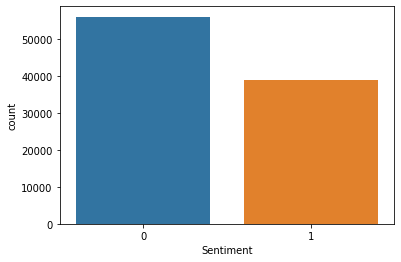

In [31]:
sns.countplot(data['Sentiment'])

In [32]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop('Sentiment', axis = 1)
y = data['Sentiment']

In [33]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
#Applying Standard scaling to get optimized result

sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Generate Model Template

In [40]:
from sklearn.metrics import accuracy_score

def runModel(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    #Let's see how our model performed
    print(classification_report(y_test, pred))
    
    #Confusion matrix for the random forest classification
    print("Confusion Matrix:\n"+str(confusion_matrix(y_test, pred)))
    
    cm = accuracy_score(y_test, pred)
    print("Accuracy:\t"+str(cm))

### Check Sample

In [41]:
import random

def check_sample(model):
    index = random.randint(1,data.shape[0]) - 1
    sample = data.iloc[index]
    sample = sample.drop('Sentiment')

    Xnew = [sample]
    ynew = model.predict(Xnew)
    print('The sentiment of frame with given parameters is:') 
    print(ynew)

    Xnew = [sample-.35]
    ynew = model.predict(Xnew)
    print('The sentiment of frame with given parameters is:') 
    print(ynew)

    Xnew = [sample+.35]
    ynew = model.predict(Xnew)
    print('The sentiment of frame with given parameters is:') 
    print(ynew)

# Classifiers

### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
runModel(rfc)
check_sample(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11142
           1       1.00      1.00      1.00      7855

    accuracy                           1.00     18997
   macro avg       1.00      1.00      1.00     18997
weighted avg       1.00      1.00      1.00     18997

Confusion Matrix:
[[11142     0]
 [    0  7855]]
Accuracy:	1.0
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]


### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
runModel(gnb)
check_sample(gnb)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     11142
           1       1.00      0.05      0.09      7855

    accuracy                           0.61     18997
   macro avg       0.80      0.52      0.42     18997
weighted avg       0.76      0.61      0.48     18997

Confusion Matrix:
[[11142     0]
 [ 7489   366]]
Accuracy:	0.6057798599778913
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() #random_state = 0
runModel(dtc)
check_sample(dtc)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11142
           1       0.95      0.98      0.96      7855

    accuracy                           0.97     18997
   macro avg       0.97      0.97      0.97     18997
weighted avg       0.97      0.97      0.97     18997

Confusion Matrix:
[[10709   433]
 [  160  7695]]
Accuracy:	0.9687845449281466
The sentiment of frame with given parameters is:
[1]
The sentiment of frame with given parameters is:
[1]
The sentiment of frame with given parameters is:
[0]


### K Nearest Neighbor

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
runModel(knn)
check_sample(knn)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11142
           1       0.99      0.99      0.99      7855

    accuracy                           0.99     18997
   macro avg       0.99      0.99      0.99     18997
weighted avg       0.99      0.99      0.99     18997

Confusion Matrix:
[[11100    42]
 [   59  7796]]
Accuracy:	0.9946833710585882
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]


### Neural Network

In [46]:
from sklearn.neural_network import MLPClassifier

nnc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
runModel(nnc)
check_sample(nnc)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     11142
           1       0.76      0.87      0.81      7855

    accuracy                           0.83     18997
   macro avg       0.83      0.84      0.83     18997
weighted avg       0.84      0.83      0.84     18997

Confusion Matrix:
[[8989 2153]
 [ 998 6857]]
Accuracy:	0.8341317050060536
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]
The sentiment of frame with given parameters is:
[0]
